# Regression with Scikit Learn

A regression is a predictive model that looks for a functional relationship between a set of variables (X) and a continuous outcome variable (y).

In other word, given an input array we try to predict a numerical value.

- Pandas Documentation: http://pandas.pydata.org/
- Scikit Learn Documentation: http://scikit-learn.org/stable/documentation.html
- Seaborn Documentation: http://seaborn.pydata.org/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Weight - Height dataset

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Visualize the dataset

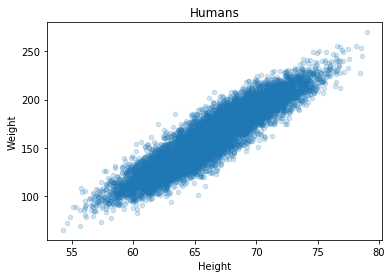

In [4]:
df.plot(kind='scatter', x='Height', y='Weight', alpha=0.2)
plt.title('Humans');

## Seaborn pairplot

In [5]:
import seaborn as sns

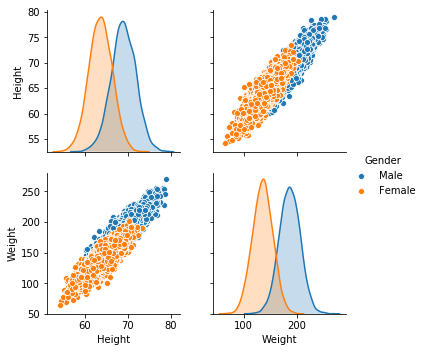

In [6]:
sns.pairplot(df, hue='Gender');

## Linear regression

### Features

In [7]:
# what's the purpose of the next line?
# try to print out df['Height'].values and X
# to figure it out

X = df[['Height']].values

### Target

In [8]:
y = df['Weight'].values

### Train/Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.3, random_state=0)

In [10]:
### Fit a Linear regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Regression weights

In [14]:
print("Slope: %.2f" % model.coef_)
print("Intercept: %.2f" % model.intercept_)

Slope: 7.72
Intercept: -351.18


### Mean square error

In [15]:
y_pred_test = model.predict(X_test)

In [16]:
mse = np.mean((y_pred_test - y_test) ** 2)

In [17]:
print("Residual sum of squares: %.2f" % mse)

Residual sum of squares: 152.22


### $R^2$ score

In [18]:
model.score(X_test, y_test)

0.8535056083267063

### Plot line of best fit with Test set

In [19]:
X_test

array([[64.72387669],
       [67.27217066],
       [74.52097209],
       ...,
       [63.77640516],
       [63.69215661],
       [64.58685574]])

In [20]:
x_min  = X_test.min()
x_max  = X_test.max()

x_line = np.linspace(x_min, x_max, 100) # dim 1 array
X_line = np.expand_dims(x_line, 1) # dim 2 array, same values

y_line = model.predict(X_line)

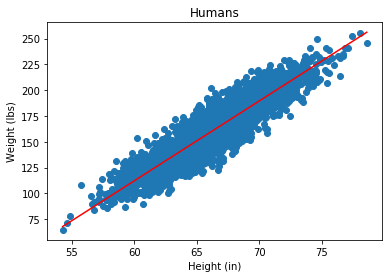

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_line, y_line, color = 'red')
plt.title('Humans')
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)');

## Exercise 1

In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:
- Load the dataset ../data/housing-data.csv
- plot the histograms for each feature using `sns.pairplot`. Choose the most appropriate column for `hue`.
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model
- split the data into train and test with a 20% test size and random state zero
- train the model on the training set and check its R2 coefficient on training and test set
- how's your model doing?
- predict the price of a house of 2000 sqft with 3 bedrooms and 20 years of age

This dataset contains multiple columns:
- sqft
- bdrms
- age
- price


## Exercise 2
Let's expand beyond the linear regression.
- Train a regularized regression model like [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) or [any other regression model](http://scikit-learn.org/stable/modules/linear_model.html) on the training dataset and test the score on the test set
- does regularization improve the score?
- Try changing the regularization strength alpha
(You could try several models programmatically and collect all the results in a nice table)